# Whale/walrus classifier

This notebook reads some content from the Wikipedia articles on Whales and Walruses.  We then give it some more sentences, and ask it to predict whether it came from the Whale article or Walrus article.

## First, read some portions of wikipedia articles into memory

In [3]:
whale_article_opening = '''
Whales are a widely distributed and diverse group of fully aquatic placental marine mammals. As an informal and colloquial grouping, they correspond to large members of the infraorder Cetacea, i.e. all cetaceans apart from dolphins and porpoises. Dolphins and porpoises may be considered whales from a formal, cladistic perspective. Whales, dolphins and porpoises belong to the order Cetartiodactyla, which consists of even-toed ungulates. Their closest non-cetacean living relatives are the hippopotamuses, from which they and other cetaceans diverged about 54 million years ago. The two parvorders of whales, baleen whales (Mysticeti) and toothed whales (Odontoceti), are thought to have had their last common ancestor around 34 million years ago. Mysticetes include four extant (living) families: Balaenopteridae (the rorquals), Balaenidae (right whales), Cetotheriidae (the pygmy right whale), and Eschrichtiidae (the grey whale). Odontocetes include the Monodontidae (belugas and narwhals), Physeteridae (the sperm whale), Kogiidae (the dwarf and pygmy sperm whale), and Ziphiidae (the beaked whales), as well as the six families of dolphins and porpoises which are not considered whales in the informal sense.

Whales are fully aquatic, open-ocean animals: they can feed, mate, give birth, suckle and raise their young at sea. Whales range in size from the 2.6 metres (8.5 ft) and 135 kilograms (298 lb) dwarf sperm whale to the 29.9 metres (98 ft) and 190 tonnes (210 short tons) blue whale, which is the largest known animal that has ever lived. The sperm whale is the largest toothed predator on Earth. Several whale species exhibit sexual dimorphism, in that the females are larger than males.

Baleen whales have no teeth; instead, they have plates of baleen, fringe-like structures that enable them to expel the huge mouthfuls of water they take in while retaining the krill and plankton they feed on. Because their heads are enormous—making up as much as 40% of their total body mass—and they have throat pleats that enable them to expand their mouths, they are able to take huge quantities of water into their mouth at a time. Baleen whales also have a well-developed sense of smell.

Toothed whales, in contrast, have conical teeth adapted to catching fish or squid. They also have such keen hearing—whether above or below the surface of the water—that some can survive even if they are blind. Some species, such as sperm whales, are particularly well adapted for diving to great depths to catch squid and other favoured prey.

Whales evolved from land-living mammals, and must regularly surface to breathe air, although they can remain underwater for long periods of time. Some species, such as the sperm whale, can stay underwater for up to 90 minutes.[2] They have blowholes (modified nostrils) located on top of their heads, through which air is taken in and expelled. They are warm-blooded, and have a layer of fat, or blubber, under the skin. With streamlined fusiform bodies and two limbs that are modified into flippers, whales can travel at speeds of up to 20 knots, though they are not as flexible or agile as seals. Whales produce a great variety of vocalizations, notably the extended songs of the humpback whale. Although whales are widespread, most species prefer the colder waters of the Northern and Southern Hemispheres and migrate to the equator to give birth. Species such as humpbacks and blue whales are capable of travelling thousands of miles without feeding. Males typically mate with multiple females every year, but females only mate every two to three years. Calves are typically born in the spring and summer; females bear all the responsibility for raising them. Mothers in some species fast and nurse their young for one to two years. 
'''

In [4]:
walrus_article_opening = '''
The walrus (Odobenus rosmarus) is a large pinniped marine mammal with discontinuous distribution about the North Pole in the Arctic Ocean and subarctic seas of the Northern Hemisphere. It is the only extant species in the family Odobenidae and genus Odobenus. This species is subdivided into two subspecies:[3] the Atlantic walrus (O. r. rosmarus), which lives in the Atlantic Ocean, and the Pacific walrus (O. r. divergens), which lives in the Pacific Ocean.

Adult walrus are characterised by prominent tusks and whiskers, and considerable bulk: adult males in the Pacific can weigh more than 2,000 kilograms (4,400 pounds)[4] and, among pinnipeds, are exceeded in size only by the two species of elephant seals.[5] Walrus live mostly in shallow waters above the continental shelves, spending significant amounts of their lives on the sea ice looking for benthic bivalve molluscs. Walruses are relatively long-lived, social animals, and are considered to be a "keystone species" in the Arctic marine regions.

The walrus has played a prominent role in the cultures of many indigenous Arctic peoples, who have hunted it for meat, fat, skin, tusks, and bone. During the 19th century and the early 20th century, walrus were widely hunted for their blubber, walrus ivory, and meat. The population of walruses dropped rapidly all around the Arctic region. It has rebounded somewhat since, though the populations of Atlantic and Laptev walruses remain fragmented and at low levels compared with the time before human interference. 

The origin of the word walrus derives from a Germanic language, and it has been attributed largely to either Dutch or Old Norse. Its first part is thought to derive from a word such as Old Norse hvalr ('whale') and the second part has been hypothesized to come from the Old Norse word hross ('horse').[6] For example, the Old Norse word hrosshvalr means 'horse-whale' and is thought to have been passed in an inverted form to both Dutch and the dialects of northern Germany as walros and Walross.[7] An alternative theory is that it comes from the Dutch words wal 'shore' and reus 'giant'.[8]

The species name rosmarus is Scandinavian. The Norwegian manuscript Konungs skuggsjá, thought to date from around AD 1240, refers to the walrus as rosmhvalr in Iceland and rostungr in Greenland (walruses were by now extinct in Iceland and Norway, while the word evolved in Greenland). Several place names in Iceland, Greenland and Norway may originate from walrus sites: Hvalfjord, Hvallatrar and Hvalsnes to name some, all being typical walrus breeding grounds.
'''

## Then separate them into sentences sloppily

In [6]:
whale_sentences = whale_article_opening.split('.')

In [7]:
walrus_sentences = walrus_article_opening.split('.')

## Then vectorize them

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

corpus = whale_sentences + walrus_sentences
tokenized_corpus = vectorizer.fit_transform(corpus)
tokenized_corpus

<57x464 sparse matrix of type '<class 'numpy.int64'>'
	with 921 stored elements in Compressed Sparse Row format>

## Create a the numpy arrays (x needs to be two-dimensional, y needs to be one-dimensional)

`x` is the vectorized data, `y` is 0 if it is a whale and 1 if it is a walrus

In [11]:
import numpy as np

x = vectorizer.transform(whale_sentences + walrus_sentences).toarray()
y = np.array((list(map(lambda x: 0, whale_sentences)) + list(map(lambda x: 1, walrus_sentences))))


In [12]:
x.shape

(57, 464)

In [13]:
y.shape

(57,)

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Splitting Data into Training and Test Sets

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

## Create a Logistic Regression model


In [18]:
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

LogisticRegression()

# Predict if it is whale (0) or walrus (1)

In [23]:
new_whale_sentences = '''
The whale eye is relatively small for its size, yet they do retain a good degree of eyesight. As well as this, the eyes of a whale are placed on the sides of its head, so their vision consists of two fields, rather than a binocular view like humans have. When belugas surface, their lens and cornea correct the nearsightedness that results from the refraction of light; they contain both rod and cone cells, meaning they can see in both dim and bright light, but they have far more rod cells than they do cone cells. Whales do, however, lack short wavelength sensitive visual pigments in their cone cells indicating a more limited capacity for colour vision than most mammals.[51] Most whales have slightly flattened eyeballs, enlarged pupils (which shrink as they surface to prevent damage), slightly flattened corneas and a tapetum lucidum; these adaptations allow for large amounts of light to pass through the eye and, therefore, a very clear image of the surrounding area. They also have glands on the eyelids and outer corneal layer that act as protection for the cornea.
'''.split('.')
new_whale_sentences

['\nThe whale eye is relatively small for its size, yet they do retain a good degree of eyesight',
 ' As well as this, the eyes of a whale are placed on the sides of its head, so their vision consists of two fields, rather than a binocular view like humans have',
 ' When belugas surface, their lens and cornea correct the nearsightedness that results from the refraction of light; they contain both rod and cone cells, meaning they can see in both dim and bright light, but they have far more rod cells than they do cone cells',
 ' Whales do, however, lack short wavelength sensitive visual pigments in their cone cells indicating a more limited capacity for colour vision than most mammals',
 '[51] Most whales have slightly flattened eyeballs, enlarged pupils (which shrink as they surface to prevent damage), slightly flattened corneas and a tapetum lucidum; these adaptations allow for large amounts of light to pass through the eye and, therefore, a very clear image of the surrounding area',
 

In [24]:
model.predict(vectorizer.transform(new_whale_sentences)) # it does a great job!

array([0, 0, 0, 0, 0, 0, 0])

In [25]:
new_walrus_sentences = '''
Aside from the vibrissae, the walrus is sparsely covered with fur and appears bald. Its skin is highly wrinkled and thick, up to 10 cm (4 in) around the neck and shoulders of males. The blubber layer beneath is up to 15 cm (6 in) thick. Young walruses are deep brown and grow paler and more cinnamon-colored as they age. Old males, in particular, become nearly pink. Because skin blood vessels constrict in cold water, the walrus can appear almost white when swimming. As a secondary sexual characteristic, males also acquire significant nodules, called "bosses", particularly around the neck and shoulders.[30]

The walrus has an air sac under its throat which acts like a flotation bubble and allows it to bob vertically in the water and sleep. The males possess a large baculum (penis bone), up to 63 cm (25 in) in length, the largest of any land mammal, both in absolute size and relative to body size.[5] 
'''.split('.')

In [26]:
model.predict(vectorizer.transform(new_walrus_sentences)) # it is a little confused!

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [27]:
model.score(X_test, y_test)

0.8

# Confusion matrix

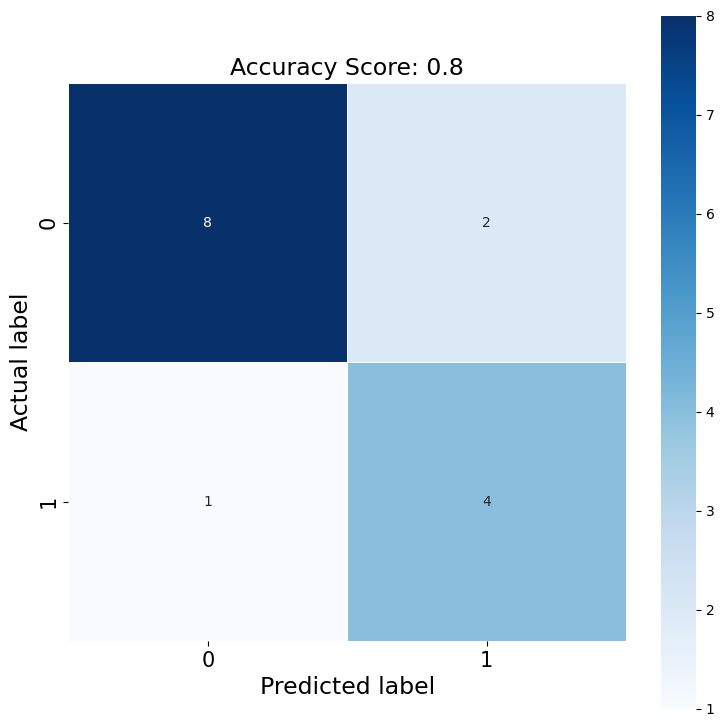

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, model.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(model.score(X_test, y_test)), size = 17);
plt.tick_params(labelsize= 15)